In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [2]:
def get_metrics(data_frame):
    TN = data_frame.iloc[0,0]
    TP = data_frame.iloc[1,1]
    FP = data_frame.iloc[0,1]
    FN = data_frame.iloc[1,0]
    
    acuracia = (TP + TN)/(TP+TN+FP+FN)
    precisao = TP/(TP+FP)
    especificidade = TN/(TN+FP)
    sensitividade = TP/(TP+FN)
    
    return { 
            "acuracia": acuracia,
            "precisao": precisao,
            "especificidade": especificidade,
            "sensitividade": sensitividade
            }

In [3]:
dados = pd.read_excel('./Rice_Cammeo_Osmancik.xlsx')
dados.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [4]:
dados.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik
3809,11434,404.709991,161.079269,90.868195,0.825692,11591,0.802949,Osmancik


In [5]:
dados = pd.get_dummies(data=dados, columns=['Class'], drop_first=True)

In [6]:
rice_classes = ['Cammeo', 'Osmancik']
dados.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class_Osmancik
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0


In [7]:
dados = dados.sample(frac=1, random_state=10).reset_index(drop=True)

X = dados.drop('Class_Osmancik', axis = 1)
y = dados.Class_Osmancik
X_std = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=10)
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [8]:
cfmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=["Pred Cammeo", "Pred Osmancik"], index=["Ver Cammeo", "Ver Osmancik"])
#cfmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["Pred Cammeo", "Pred Osmancik"], index=["Ver Cammeo", "Ver Osmancik"])
cfmatrix

,Pred Cammeo,Pred Osmancik
Ver Cammeo,0.932790,0.067210
Ver Osmancik,0.070552,0.929448


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       491
           1       0.95      0.93      0.94       652

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143



In [10]:
metrics = get_metrics(cfmatrix)
metrics

{'acuracia': 0.9311190383966614,
 'precisao': 0.9325648306598718,
 'especificidade': 0.9327902240325866,
 'sensitividade': 0.9294478527607362}

In [11]:
correlation = dados.corr()[['Class_Osmancik']].sort_values(by='Class_Osmancik')
correlation

,Class_Osmancik
Major_Axis_Length,-0.827824
Perimeter,-0.806572
Convex_Area,-0.750424
Area,-0.746400
Eccentricity,-0.588916
Minor_Axis_Length,-0.370355
Extent,0.117727
Class_Osmancik,1.000000


In [12]:
X2 = dados.drop('Class_Osmancik', axis = 1)
y2 = dados.Class_Osmancik
X2_std = StandardScaler().fit_transform(X2)

lr = LogisticRegression(random_state=42)
selector = RFE(estimator=lr, n_features_to_select=3, step=1)
selector = selector.fit(X2_std, y2)

X2 = X2[X2.columns[selector.support_]]
X2_std = StandardScaler().fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_std, y2, test_size = 0.3, random_state=10)

lr.fit(X2_train, y2_train)
y2_pred = lr.predict(X2_test)

In [13]:
cfmatrix2 = pd.DataFrame(confusion_matrix(y2_test, y2_pred, normalize='true'), columns=["Pred Cammeo", "Pred Osmancik"], index=["Ver Cammeo", "Ver Osmancik"])
#cfmatrix2 = pd.DataFrame(confusion_matrix(y2_test, y2_pred), columns=["Pred Cammeo", "Pred Osmancik"], index=["Ver Cammeo", "Ver Osmancik"])
cfmatrix2

,Pred Cammeo,Pred Osmancik
Ver Cammeo,0.932790,0.067210
Ver Osmancik,0.067485,0.932515


In [14]:
X2.columns

Index(['Perimeter', 'Eccentricity', 'Convex_Area'], dtype='object')

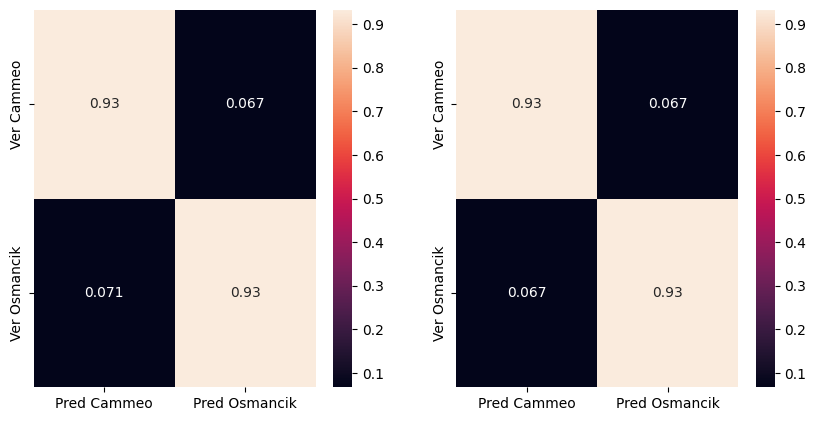

In [15]:
plt.figure(figsize=(10, 5), dpi=100)

plt.subplot(1,2,1)
sns.heatmap(data=cfmatrix, annot=True)

plt.subplot(1,2,2)
sns.heatmap(data=cfmatrix2, annot=True);

In [16]:
print(classification_report(y_test, y_pred, target_names=rice_classes))

              precision    recall  f1-score   support

      Cammeo       0.91      0.93      0.92       491
    Osmancik       0.95      0.93      0.94       652

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143



In [17]:
metrics

{'acuracia': 0.9311190383966614,
 'precisao': 0.9325648306598718,
 'especificidade': 0.9327902240325866,
 'sensitividade': 0.9294478527607362}

In [18]:
print(classification_report(y2_test, y2_pred, target_names=rice_classes))

              precision    recall  f1-score   support

      Cammeo       0.91      0.93      0.92       491
    Osmancik       0.95      0.93      0.94       652

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143



In [19]:
metrics2 = get_metrics(cfmatrix2)
metrics2

{'acuracia': 0.9326527807279497,
 'precisao': 0.9327717438852158,
 'especificidade': 0.9327902240325866,
 'sensitividade': 0.9325153374233128}